<a href="https://colab.research.google.com/github/LEEYOENN/ArtificialNeural-Network-Deep-Learning/blob/main/Peaple_emotion_multiful_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, Input
from keras.layers import Dense, Flatten
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
import pickle, cv2
import os

In [ ]:
data = np.load("/content/drive/MyDrive/DeepLearning/train.npz")
print(data.files)
['x', 'y']
x_train = data['x']
y_train = data['y']

['x', 'y']


In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,
#                                                     test_size=0.2,
#                                                     random_state=42)
##이미지셋 개수 확인
print("학습셋 이미지 수: %d" % (x_train.shape[0]))
#print("테스트셋 이미지 수: %d" % (x_test.shape[0]))

학습셋 이미지 수: 29540


In [ ]:
print(y_train)

[4 3 0 ... 3 3 3]


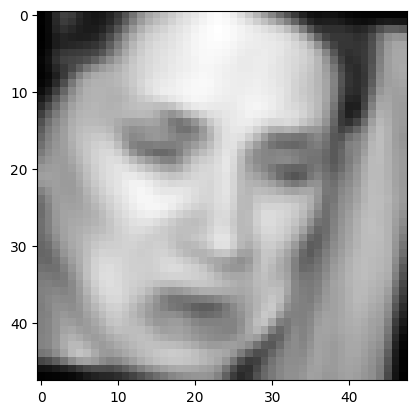

In [ ]:
##X_TRAIN의 10000번째 이미지보기

plt.figure()
plt.imshow(x_train[10000], cmap="gray")
plt.show()

In [ ]:
##이미지 데이터셋 숫자 살펴보기
import sys
for row in x_train[0]:
  for pixel in row:
    sys.stdout.write("%-3d" % pixel)
  sys.stdout.write("\n")

18016714512512011112415318019520221322222823223823924123924022721421220518616517099 51 60 62 67 64 39 56 28 19 19 19 25 23 16 43 53 71 53 72 137
17616113112111611213517219119920622122723423924324124224324223522522021620218818314956 49 54 55 63 46 38 39 16 19 15 20 27 17 20 48 53 66 48 100
16913911811811912515018019620421622422623523924224224124224323823022622621620119117510034 49 52 55 54 35 36 24 15 18 14 22 26 14 29 47 57 55 65 
15712011512212813416418919620921722222923623924024124124124123823322422622521320118213667 31 50 50 51 38 31 33 17 15 16 17 27 19 15 39 47 60 52 
13511011311611814216918519621022323123623823924024024124023823623522722822922120919915410242 29 53 54 41 27 30 27 12 17 14 22 26 15 20 43 43 58 
11810510610210913116318620521722322723423924024023923923823423323222622722622321520319011973 28 35 55 43 27 29 32 19 11 17 15 26 21 12 30 47 44 
10810198 92 95 12717519921522322623123523824024023823723623123523422622222022221621120817189 56 27 45 47 30 25 23 24 13 14 13 19 2

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1).astype("float64") / 255
#x_test = x_test.reshape(x_test.shape[0], 2304).astype("float64") / 255
x_train[0]

In [ ]:
##0번째 레이블의 클래스확인 : 3
#print("Class: %d" % (y_train[0]))

In [ ]:
y_train = keras.utils.to_categorical(y_train, 5)
#y_test = keras.utils.to_categorical(y_test, 5)

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 1.]


In [ ]:

def build_model() :
  model = Sequential()
  model.add(Input(shape=(48, 48, 1)))
  model.add(Conv2D(filters=32, kernel_size=(4, 4), activation="relu"))
  model.add(Conv2D(64, (4,4), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(rate=0.25))
  model.add(Flatten())
  model.add(Dense(1024, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(512, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(5, activation="softmax"))
  return model
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 45, 45, 32)        544       
                                                                 
 conv2d_5 (Conv2D)           (None, 42, 42, 64)        32832     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 21, 21, 64)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 21, 21, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 28224)             0         
                                                                 
 dense_6 (Dense)             (None, 1024)              28902400  
                                                      

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#모델 최적화를 위한 설정구간
modelpath = "facial_model.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_los", verbose=0, save_best_model=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

In [ ]:
from sklearn.model_selection import KFold
k = 5
cv = KFold(n_splits = k, shuffle=True)
acc_list = []
for train_index, test_index in cv.split(x_train) :
  x_train1 = x_train[train_index,:]
  x_test1 = x_train[test_index,:]

  y_train1 = y_train[train_index]
  y_test1 = y_train[test_index]


  history = model.fit(x_train1, y_train1, epochs=2000, batch_size=35, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

  acc_list.append(100 * model.evaluate(x_test1, y_test1, verbose=2)[1])
  score = model.evaluate(x_test1, y_test1)
  print("Test Accuracy: %.2f%%" % (score[1] * 100))
print(sum(acc_list)/5)

Epoch 1/2000
507/507 [==============================] - 18s 32ms/step - loss: 1.3375 - accuracy: 0.4211 - val_loss: 1.0220 - val_accuracy: 0.5872
Epoch 2/2000
507/507 [==============================] - 16s 31ms/step - loss: 0.9988 - accuracy: 0.5946 - val_loss: 0.8834 - val_accuracy: 0.6471
Epoch 3/2000
507/507 [==============================] - 16s 32ms/step - loss: 0.8393 - accuracy: 0.6623 - val_loss: 0.7933 - val_accuracy: 0.6801
Epoch 4/2000
507/507 [==============================] - 14s 27ms/step - loss: 0.7157 - accuracy: 0.7181 - val_loss: 0.7258 - val_accuracy: 0.7079
Epoch 5/2000
507/507 [==============================] - 15s 30ms/step - loss: 0.6186 - accuracy: 0.7589 - val_loss: 0.7591 - val_accuracy: 0.7014
Epoch 6/2000
507/507 [==============================] - 15s 29ms/step - loss: 0.5104 - accuracy: 0.8026 - val_loss: 0.7301 - val_accuracy: 0.7258
Epoch 7/2000
507/507 [==============================] - 16s 31ms/step - loss: 0.4158 - accuracy: 0.8404 - val_loss: 0.7604 -

In [ ]:
# history = model.fit(x_train, y_train,
#                     validation_split=0.25, epochs=300,
#                     batch_size=200, verbose=1,
#                     callbacks=[early_stopping_callback, checkpointer])
# print("Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


In [ ]:
y_loss = history.history["loss"]

y_vloss = history.history["val_loss"]

num = len(y_loss)
plt.figure()
plt.plot(range(num), y_loss, marker='o', c='blue', label='Training')
plt.plot(range(num), y_vloss, marker='o', c='red', label='Validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [ ]:

data = np.load("/content/drive/MyDrive/DeepLearning/test.npz")
print(data.files)
['x']
x_pred = data['x']
x_pred = x_pred.reshape(x_pred.shape[0], 48,48,1).astype("float64") / 255
y_pred = model.predict(x_pred)
a = []
for i in y_pred :
  a.append(i.argmax())


with open("facial_answer.txt", "w") as f:
  for i in a :
    data =  "%d\n"%i
    f.write(data)
len(y_pred)


